In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
# loading dataset
df=pd.read_csv('/content/Reviews.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
df.head()#to display top rows in the dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df.isnull().sum()#to find the total number of null values present in dataset

Review    0
Liked     0
dtype: int64

In [6]:
df.duplicated().sum()#to know the number of duplicates in the dataset

6

In [7]:
df.drop_duplicates(inplace=True)#dropping duplicates to improve the quality of dataset
df.duplicated().sum()

0

In [8]:
df.shape

(994, 2)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
from wordcloud import WordCloud

In [11]:
combine_text=" ".join(df['Review'])

In [12]:
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(combine_text)

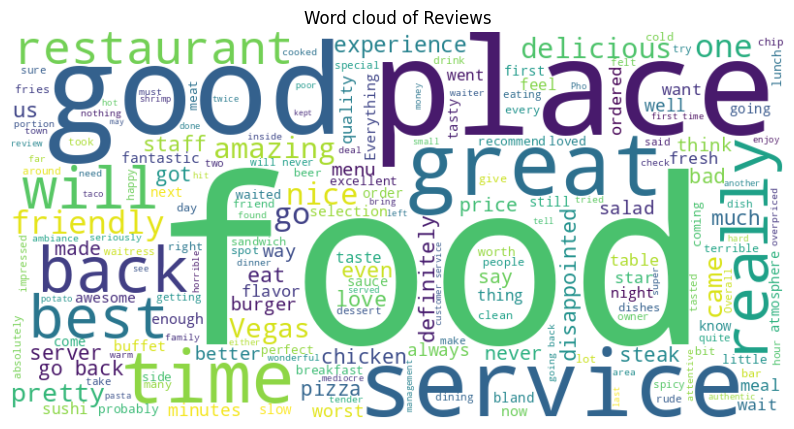

In [13]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of Reviews')
plt.show()

In [14]:
from collections import Counter

In [15]:
targeted_words = ['good','great','amazing','bad']
all_words = " ".join(df['Review']).lower().split() #flatten reviews into a single list of words
word_counts = Counter(all_words)
target_word_count = {word: word_counts[word] for word in targeted_words}

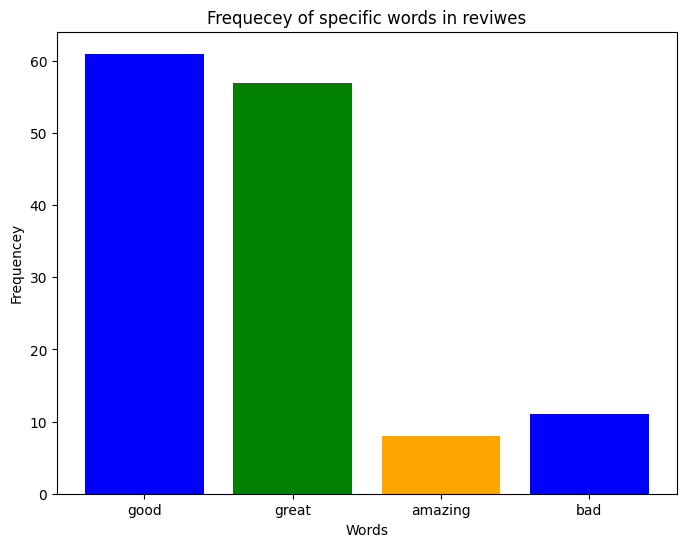

In [16]:
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(), target_word_count.values(), color=['blue', 'green', 'orange','blue'])
plt.xlabel('Words')
plt.ylabel('Frequencey')
plt.title('Frequecey of specific words in reviwes')
plt.show()

**text preprocessing**

In [17]:
!pip install nltk
from nltk.tokenize import word_tokenize

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
df['Tokens'] = df['Review'].apply(word_tokenize)

# Print the 'Tokens' column
print(df['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 994, dtype: object


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  994 non-null    object
 1   Liked   994 non-null    int64 
 2   Tokens  994 non-null    object
dtypes: int64(1), object(2)
memory usage: 31.1+ KB


In [23]:
df.head()

,Review,Liked,Tokens
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an..."


In [24]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [25]:
from nltk.corpus import stopwords

# Assuming 'df' is your DataFrame and 'Review' is the column with text reviews
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Correctly defining the stop words set
stop_words = set(stopwords.words('english'))

# Apply tokenization and stop word removal in a single line
df['Tokens'] = df['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# Print the 'Tokens' column
print(df['Tokens'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 994, dtype: object


In [26]:
df.head()

,Review,Liked,Tokens
0,Wow... Loved this place.,1,"[Wow, ..., Loved, place, .]"
1,Crust is not good.,0,"[Crust, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, texture, nasty, .]"
3,Stopped by during the late May bank holiday of...,1,"[Stopped, late, May, bank, holiday, Rick, Stev..."
4,The selection on the menu was great and so wer...,1,"[The, selection, menu, great, prices, .]"


In [27]:
#stemming#suffix
from nltk.stem import PorterStemmer
import pandas as pd
stemmer = PorterStemmer()

df['stemmed'] = df['Review'].apply(lambda x: " ".join([stemmer.stem(word) for word in word_tokenize(x)]))

# Print the 'stemmed' column
print(df['stemmed'])

0                               wow ... love thi place .
1                                    crust is not good .
2               not tasti and the textur wa just nasti .
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                             appetit instantli gone .
997      overal i wa not impress and would not go back .
998    the whole experi wa underwhelm , and i think w...
999    then , as if i had n't wast enough of my life ...
Name: stemmed, Length: 994, dtype: object


In [28]:
df.head()

,Review,Liked,Tokens,stemmed
0,Wow... Loved this place.,1,"[Wow, ..., Loved, place, .]",wow ... love thi place .
1,Crust is not good.,0,"[Crust, good, .]",crust is not good .
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, texture, nasty, .]",not tasti and the textur wa just nasti .
3,Stopped by during the late May bank holiday of...,1,"[Stopped, late, May, bank, holiday, Rick, Stev...",stop by dure the late may bank holiday off ric...
4,The selection on the menu was great and so wer...,1,"[The, selection, menu, great, prices, .]",the select on the menu wa great and so were th...


In [29]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [30]:
from nltk.stem import WordNetLemmatizer#rootword

In [31]:
lemmatizer=WordNetLemmatizer()

In [32]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import pandas as pd

nltk.download('punkt')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['Lemmatized'] = df['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in word_tokenize(x)]))

# Print the 'Lemmatized' column
print(df['Lemmatized'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                             Wow ... Loved this place .
1                                    Crust be not good .
2              Not tasty and the texture be just nasty .
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly go .
997     Overall I be not impress and would not go back .
998    The whole experience be underwhelming , and I ...
999    Then , as if I have n't waste enough of my lif...
Name: Lemmatized, Length: 994, dtype: object


In [33]:
import re

# Assuming df is your DataFrame and 'Review' is the column containing reviews
df['NO_Numbers'] = df['Review'].apply(lambda x: re.sub(r'\d+', '', x))

In [34]:
import re

df['cleaned_text'] = df['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', x))

In [35]:
print(df['cleaned_text'])

0                                   Wow Loved this place
1                                      Crust is not good
2               Not tasty and the texture was just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly gone
997    Overall I was not impressed and would not go back
998    The whole experience was underwhelming and I t...
999    Then as if I hadnt wasted enough of my life th...
Name: cleaned_text, Length: 994, dtype: object


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        994 non-null    object
 1   Liked         994 non-null    int64 
 2   Tokens        994 non-null    object
 3   stemmed       994 non-null    object
 4   Lemmatized    994 non-null    object
 5   NO_Numbers    994 non-null    object
 6   cleaned_text  994 non-null    object
dtypes: int64(1), object(6)
memory usage: 62.1+ KB


In [37]:
#Normalization
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 12.2 MB/s eta 0:00:00


In [38]:

import contractions

df['Expanded'] = df['Review'].apply(lambda x: contractions.fix(x))
print(df['Expanded'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I had not wasted enough of my life...
Name: Expanded, Length: 994, dtype: object


In [39]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.6 MB/s eta 0:00:00


In [40]:
import emoji

df['Emoji'] = df['Review'].apply(emoji.demojize)
print(df['Emoji'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Emoji, Length: 994, dtype: object


In [41]:
#Remove HTML tags
!pip install beautifulsoup4

In [42]:
from bs4 import BeautifulSoup#extract data from html and xml documents

In [43]:
df['cleaned'] = df['Review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())

<ipython-input-43-6aa730ac187e>:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['cleaned'] = df['Review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())


In [44]:
print(df['cleaned'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: cleaned, Length: 994, dtype: object


In [45]:
# TF-IDF VECTORIZER
# TF = Term Frequency, IDF = Inverse Document Frequency
# It is used to transform text data into numerical feature vectors suitable for machine learning algorithms
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the 'review' column
x = vectorizer.fit_transform(df['Review'])

# 'x' now contains the TF-IDF matrix
print(x.toarray())  # Print TF-IDF matrix as array

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [48]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Review'])
y= df['Liked']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [50]:
from sklearn.naive_bayes import MultinomialNB

# Assuming x_train and y_train are already defined from previous steps

# Step 1: Instantiate the Multinomial Naive Bayes model
model = MultinomialNB()

# Step 2: Fit the model to the training data
model.fit(x_train, y_train)

MultinomialNB()

In [51]:
y_pred_train = model.predict(x_train)


In [52]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy on training data: {accuracy_train:.2f}')

# Step 5: Generate classification report for training data
report_train = classification_report(y_train, y_pred_train)
print('Classification Report on training data:')
print(report_train)

Accuracy on training data: 0.96
Classification Report on training data:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       396
           1       0.99      0.94      0.96       399

    accuracy                           0.96       795
   macro avg       0.97      0.96      0.96       795
weighted avg       0.97      0.96      0.96       795



In [53]:
def preprocess_review(review):
  review=review.lower()
  review=BeautifulSoup(review,"html.parser").get_text()
  review=re.sub(r'[^A-Za-z0-9\s]','',review)
  review=contractions.fix(review)
  review=emoji.demojize(review)
  tokens=word_tokenize(review)
  stop_words=set(stopwords.words('english'))
  tokens=[word for word in tokens if word not in stop_words]
  stemmer=PorterStemmer()
  stemmer_token=[stemmer.stem(word) for word in tokens]
  lemmatizer=WordNetLemmatizer()
  lemmatized_token=[lemmatizer.lemmatize(word,pos='v') for word in tokens]
  cleaned_review=' '.join(lemmatized_token)
  return cleaned_review

In [55]:
def predict_sentiment(new_review):
    cleaned_review = preprocess_review(new_review)  # Assuming you have defined preprocess_text function
    X_new = vectorizer.transform([cleaned_review])  # Assuming vectorizer is already defined and fitted
    prediction = model.predict(X_new)[0]  # Assuming model is already trained and defined
    return prediction

# Example usage with user input
def main():
    new_reviews = input("Enter review(s): ").split('\n')  # Input multiple reviews separated by new lines
    for review in new_reviews:
        if review.strip():  # Check if the review is not empty
            sentiment = predict_sentiment(review)
            sentiment_label = 'positive' if sentiment == 1 else 'negative'  # Assuming 1 is positive, 0 is negative
            print(f"Review: '{review}' \nPredicted sentiment: {sentiment_label}\n")

if __name__ == "__main__":
    main()

Enter review(s): this restaurance is the best in this area
Review: 'this restaurance is the best in this area' 
Predicted sentiment: positive

